In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [20]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [21]:
def decision_boundary(X, y, mean, std, theta):
    x_values = [np.min(X[:, 1]), np.max(X[:, 2])]
    y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]    
    plt.plot(x_values, y_values[0])
    plt.show()
    pass
    

In [22]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_new = (X - mean) / std
    return X_new, mean, std

In [23]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [24]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [25]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [26]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m ==0:
        return None
    
    J = (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).mean()
    return J

In [27]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None

    d_theta = np.dot(X.T,h(X, theta) - y)/m
    
    return d_theta

In [28]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = None
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha*derivative_theta(X, y, theta)
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [29]:
def predict(X, mean, std, theta):
    predictions = h(prepare_X(X), theta)
    return predictions

In [30]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [31]:
# Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому
#data_columns = ["test1", "test2"]
#target_column = "passed"
#X, y = load_datasets('tests.csv', data_columns, target_column)
#print('Training set: X={}, y={}'.format(X.shape, y.shape))

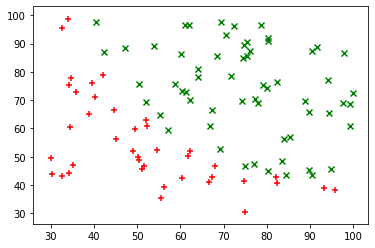

In [32]:
plot_data(X, y)

In [33]:
X_new, mean, std = normalize(X)

In [43]:
X_new = prepare_X(X_new)
y_new = y.values.reshape((X.shape[0], 1))

In [44]:
theta = np.zeros((X_new.shape[1], 1))

In [45]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [50]:
new_theta, Js = gradient_descent(X_new, y_new, theta.T, 0.01, 1e-7, 1000000, False)
print(new_theta, len(Js))

ValueError: shapes (100,5) and (1,5) not aligned: 5 (dim 1) != 1 (dim 0)

In [47]:
cost_function(X_new, y_new, new_theta)

NameError: name 'new_theta' is not defined

In [41]:
decision_boundary(X, y, mean, std, new_theta)

NameError: name 'new_theta' is not defined

In [42]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

NameError: name 'new_theta' is not defined